In [1]:
!pip install --upgrade pip
!pip install --upgrade transformers
!pip install --upgrade git+https://github.com/huggingface/accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-hwi066te
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-hwi066te
  Resolved https://github.com/huggingface/accelerate to commit 31fd2b1ad6b9c1cd1480568399a311b3caaf62dc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ...

In [2]:
# importing necessary libraries
import torch, os

In [3]:
# installing transformers dataset
!pip install transformers dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.24
    Uninstalling SQLAlchemy-2.0.24:
      Successfully uninstalled SQLAlchemy-2.0.24
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.51 which is incompatible.


In [4]:
# using the gpu
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
# loading the dataset
from google.colab import files
texts = files.upload()

Saving Corpus.csv to Corpus.csv


In [6]:
# creating pandas dataframe
import pandas as pd
column_names = ["sentenceID", "text", "author", "year", "genre", "source"]
data = pd.read_csv('Corpus.csv', header=None, sep=';', names=column_names, encoding='utf-8', quoting=3)
data = data.sample(frac=1, random_state=42)
data.head()

,sentenceID,text,author,year,genre,source
8784,8-2395,"Am merkwürdigsten ist es, daß wir oft im Traum...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke
7699,8-1310,"Da sah er, wie er zwischen Strauchwerk in hohe...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke
4894,5-1412,Enguerrand de Marigny verteidigte sich in eine...,Heinrich Heine,1832,Prosa,Franzoesische Zustaende
7168,8-779,"Andres schien getröstet, im Innern beschloß er...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke
15616,12-691,"„Ich gewinne“, sagte er, „indem ich einen bequ...",J.W. von Goethe,1809,Lyrik,Die Wahlverwandtschaften


In [7]:
data["century"] = 0
for i in range(len(data)):
    data["century"][i] = int(data["year"][i]/100 + 1)
data.head()

<ipython-input-7-864c72d1317b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["century"][i] = int(data["year"][i]/100 + 1)


,sentenceID,text,author,year,genre,source,century
8784,8-2395,"Am merkwürdigsten ist es, daß wir oft im Traum...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19
7699,8-1310,"Da sah er, wie er zwischen Strauchwerk in hohe...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19
4894,5-1412,Enguerrand de Marigny verteidigte sich in eine...,Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19
7168,8-779,"Andres schien getröstet, im Innern beschloß er...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19
15616,12-691,"„Ich gewinne“, sagte er, „indem ich einen bequ...",J.W. von Goethe,1809,Lyrik,Die Wahlverwandtschaften,19


In [8]:
data["labels"] = data["author"].apply(lambda x: 1 if x == "Heinrich Heine" else 0)

In [9]:
id2label = {1: "Heinrich Heine", 0: "Nicht-Heine"}
label2id = {"Heinrich Heine": 1, "Nicht-Heine": 0}

In [10]:
data.head()

,sentenceID,text,author,year,genre,source,century,labels
8784,8-2395,"Am merkwürdigsten ist es, daß wir oft im Traum...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
7699,8-1310,"Da sah er, wie er zwischen Strauchwerk in hohe...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
4894,5-1412,Enguerrand de Marigny verteidigte sich in eine...,Heinrich Heine,1832,Prosa,Franzoesische Zustaende,19,1
7168,8-779,"Andres schien getröstet, im Innern beschloß er...",E.T.A. Hoffmann,1817,Prosa,Nachtstuecke,19,0
15616,12-691,"„Ich gewinne“, sagte er, „indem ich einen bequ...",J.W. von Goethe,1809,Lyrik,Die Wahlverwandtschaften,19,0


In [11]:
data.labels.value_counts()

0    13302
1     6389
Name: labels, dtype: int64

In [12]:
# importing BERT tokenizer and sequence classifier
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [13]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id)
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [14]:
data = data.dropna()

In [ ]:
#from sklearn.model_selection import train_test_split

#X = data["text"]
#y = data["labels"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [ ]:
#len(X_train), len(X_val), len(X_test)

(9845, 4923, 4923)

In [15]:
# split the data into train, val and test sets
SIZE = data.shape[0]

train_texts   = list(data.text[:SIZE//2])
val_texts     = list(data.text[SIZE//2:(3*SIZE)//4 ])
test_texts    = list(data.text[(3*SIZE)//4:])

train_labels  = list(data.labels[:SIZE//2])
val_labels    = list(data.labels[SIZE//2:(3*SIZE)//4])
test_labels   = list(data.labels[(3*SIZE)//4:])

In [16]:
len(train_texts), len(val_texts), len(test_texts)

(9845, 4923, 4923)

In [17]:
# Is the train data balanced?
data[:9845].labels.value_counts()

0    6632
1    3213
Name: labels, dtype: int64

<Axes: ylabel='labels'>

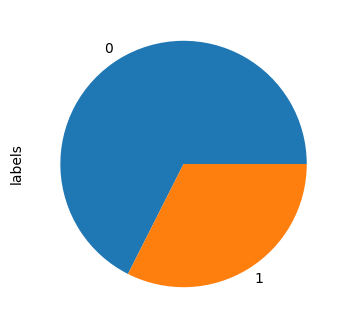

In [18]:
data.labels.value_counts().plot(kind="pie", figsize=(4,4))

In [19]:
data[:9845].author.value_counts()

E.T.A. Hoffmann    3827
Heinrich Heine     3213
J.W. von Goethe    2267
Theodor Storm       538
Name: author, dtype: int64

<Axes: ylabel='author'>

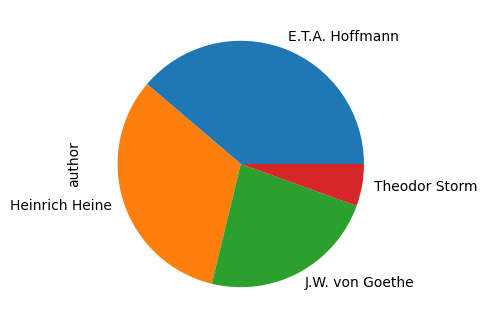

In [20]:
data.author.value_counts().plot(kind="pie", figsize=(4,4))

In [21]:
# encode the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings  = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

In [22]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [23]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [24]:
# import trainer class
from transformers import TrainingArguments, Trainer

In [25]:
# define the metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [55]:
# install accelerators
#!pip install --upgrade transformers
#!pip install git+https://github.com/huggingface/accelerate
#!pip install transformers[torch]
#!pip install accelerate -U
#!pip install -U transformers

  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-q8oqhpm2
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-q8oqhpm2
  Resolved https://github.com/huggingface/accelerate to commit 31fd2b1ad6b9c1cd1480568399a311b3caaf62dc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [26]:
# setup of the trainer
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir= './HeinrichT',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
    # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [27]:
# Initializing the trainer class
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
    # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics= compute_metrics
)

In [28]:
# Train/fine-tune the BERT classifier
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,0.653000,0.641451,0.676214,0.403417,0.338107,0.500000
100,0.625900,0.621629,0.679870,0.439736,0.633433,0.512839
150,0.616800,0.592681,0.703230,0.616993,0.652314,0.612016
200,0.593000,0.598128,0.676417,0.404093,0.838176,0.500314
250,0.562200,0.543261,0.701198,0.493167,0.773545,0.542833
300,0.589200,0.524765,0.742027,0.663431,0.714825,0.652801
350,0.550000,0.431264,0.804591,0.771435,0.779248,0.765434
400,0.479300,0.391661,0.823888,0.789656,0.807259,0.778395
450,0.421200,0.419733,0.807434,0.786817,0.780302,0.796800
500,0.481000,0.372303,0.841357,0.815270,0.822383,0.809458


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=3080, training_loss=0.24454713649563975, metrics={'train_runtime': 4668.6769, 'train_samples_per_second': 10.544, 'train_steps_per_second': 0.66, 'total_flos': 1.0776170633283e+16, 'train_loss': 0.24454713649563975, 'epoch': 5.0})

In [29]:
# Return a table with the scores
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.119470,0.959472,0.953976,0.953365,0.954595
val,0.342680,0.880358,0.863634,0.862992,0.864289
test,0.379723,0.869185,0.850339,0.849652,0.851039
